> # *Crop Recommendation Analysis*

## Import Modules required

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Overview

In [2]:
# load dataset and take overview

dataset = pd.read_csv("../Datasets/Crop_Recommendation_Dataset.csv")
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# View basic information related to dataset 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2206 non-null   int64  
 1   P            2206 non-null   int64  
 2   K            2206 non-null   int64  
 3   temperature  2203 non-null   float64
 4   humidity     2206 non-null   float64
 5   ph           2203 non-null   float64
 6   rainfall     2202 non-null   float64
 7   label        2206 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 138.0+ KB


## Data Cleaning

In [4]:
# find duplicate rows 

series = dataset.duplicated()
series[series == True]

105     True
176     True
274     True
874     True
1390    True
dtype: bool

In [5]:
# View duplicate rows 

dataset.loc[[105,176,274,874,1390]]

,N,P,K,temperature,humidity,ph,rainfall,label
105,82,43,38,23.286172,81.433216,5.105588,242.317063,rice
176,95,38,22,19.849394,61.245001,5.730617,100.768925,maize
274,22,67,78,17.166064,14.424575,6.204091,72.326675,chickpea
874,33,59,19,23.193053,62.747108,7.641024,49.552133,lentil
1390,92,7,45,26.706078,81.141495,6.944640,51.510336,watermelon


In [6]:
# Remove duplicate rows

dataset.drop([105,176,274,874,1390],axis=0,inplace=True)

In [7]:
# count of duplicate rows to cross check that all duplicates has been removed

dataset.duplicated().sum()

0

In [8]:
# count of null values in every column

col = dataset.columns
col = list(col)
for j in col:
    print(f"{j} => {dataset[j].isnull().sum()}")

N => 0
P => 0
K => 0
temperature => 3
humidity => 0
ph => 3
rainfall => 4
label => 0


In [9]:
# Drop all rows where any value is null, As number of rows are not much so we can drop them

dataset.dropna(inplace=True)
for j in col:
    print(f"{j} => {dataset[j].isnull().sum()}")

N => 0
P => 0
K => 0
temperature => 0
humidity => 0
ph => 0
rainfall => 0
label => 0


## Data Transformation

In [10]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2201,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2202,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2203,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2204,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [11]:
# crop to digit dict 

crop_to_digit = {
    'rice' : 1,
    'maize' : 2,
    'chickpea' : 3,
    'kidneybeans' : 4,
    'pigeonpeas' : 5,
    'mothbeans' : 6,
    'mungbean' : 7,
    'blackgram' : 8,
    'lentil' : 9,
    'pomegranate' : 10,
    'banana' : 11,
    'mango' : 12,
    'grapes' : 13,
    'watermelon' : 14,
    'muskmelon' : 15,
    'apple' : 16,
    'orange' : 17,
    'papaya' : 18,
    'coconut' : 19,
    'cotton' : 20,
    'jute' : 21,
    'coffee' : 22
}

# digit to crop dict 

digit_to_crop = {
     1 : 'rice',
     2 : 'maize',
     3 : 'chickpea',
     4 : 'kidneybeans',
     5 : 'pigeonpeas',
     6 : 'mothbeans',
     7 : 'mungbean',
     8 : 'blackgram',
     9 : 'lentil',
    10 : 'pomegranate',
    11 : 'banana',
    12 : 'mango',
    13 : 'grapes',
    14 : 'watermelon',
    15 : 'muskmelon',
    16 : 'apple',
    17 : 'orange',
    18 : 'papaya',
    19 : 'coconut',
    20 : 'cotton',
    21 : 'jute',
    22 : 'coffee'
}

In [12]:
# Transform label from string to integer

# Fit and transform the 'Category' column
dataset['label'] = dataset['label'].map(crop_to_digit)

dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2201,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2202,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2203,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2204,117,32,34,26.272418,52.127394,6.758793,127.175293,22


## Data Analysis

In [13]:
# View basic analysis of columns 

dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,50.533090,53.353263,48.042903,25.625484,71.446780,6.469614,103.626322,11.494751
std,36.891717,32.941976,50.522611,5.067714,22.289889,0.774730,54.980721,6.355729
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,1.000000
25%,21.000000,28.000000,20.000000,22.774665,60.197391,5.970895,64.752243,6.000000
50%,37.000000,51.000000,32.000000,25.609734,80.458463,6.425420,95.048716,11.000000
75%,84.000000,68.000000,48.500000,28.568206,89.960531,6.924267,124.440907,17.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,22.000000


In [14]:
# find correlation matrix

corr_matrix = dataset.corr()
corr_matrix

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.227555,-0.139505,0.025056,0.190133,0.096701,0.060835,0.282938
P,-0.227555,1.000000,0.736684,-0.126411,-0.119317,-0.137706,-0.066186,-0.168889
K,-0.139505,0.736684,1.000000,-0.160028,0.188996,-0.168414,-0.055219,0.142072
temperature,0.025056,-0.126411,-0.160028,1.000000,0.205954,-0.019002,-0.031096,0.180886
humidity,0.190133,-0.119317,0.188996,0.205954,1.000000,-0.007778,0.095139,0.523905
ph,0.096701,-0.137706,-0.168414,-0.019002,-0.007778,1.000000,-0.108668,0.053051
rainfall,0.060835,-0.066186,-0.055219,-0.031096,0.095139,-0.108668,1.000000,0.121725
label,0.282938,-0.168889,0.142072,0.180886,0.523905,0.053051,0.121725,1.000000


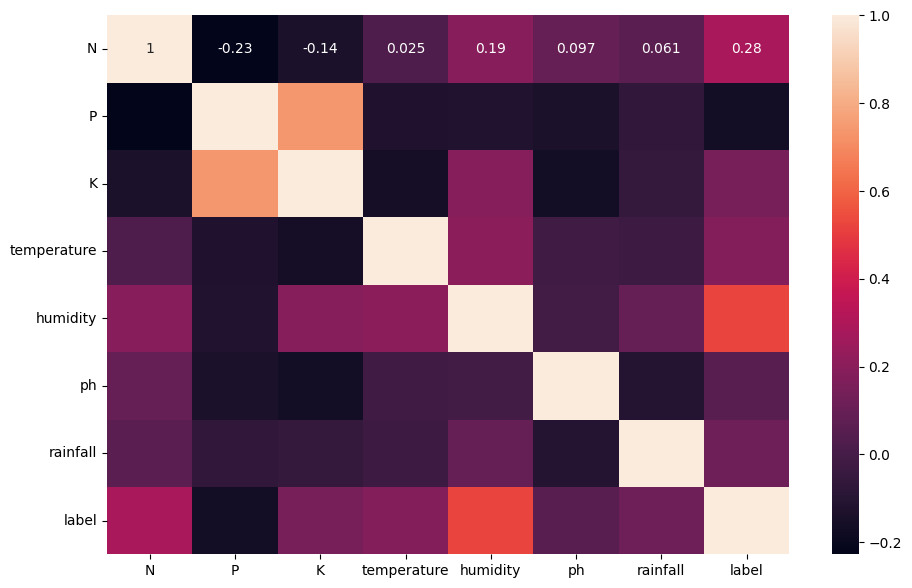

In [15]:
# plotting the heatmap for correlation matrix


plt.figure(figsize=(11, 7))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

### Remove ph parameter

In [16]:
dataset.drop('ph',axis=1,inplace=True)
dataset.head()

,N,P,K,temperature,humidity,rainfall,label
0,90,42,43,20.879744,82.002744,202.935536,1
1,85,58,41,21.770462,80.319644,226.655537,1
2,60,55,44,23.004459,82.320763,263.964248,1
3,74,35,40,26.491096,80.158363,242.864034,1
4,78,42,42,20.130175,81.604873,262.717340,1


## Model Building

In [17]:
# Seperating target variable from features

X = dataset.drop('label',axis=1)
Y = dataset['label']

In [18]:
X.head()

,N,P,K,temperature,humidity,rainfall
0,90,42,43,20.879744,82.002744,202.935536
1,85,58,41,21.770462,80.319644,226.655537
2,60,55,44,23.004459,82.320763,263.964248
3,74,35,40,26.491096,80.158363,242.864034
4,78,42,42,20.130175,81.604873,262.717340


In [19]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [20]:
# Splitting Dataset

from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [21]:
print("x train size = ",X_train.size)
print("x test size = ",X_test.size)

x train size =  11172
x test size =  1974


In [22]:
X_train

,N,P,K,temperature,humidity,rainfall
1442,120,8,46,29.556575,90.709373,28.365356
335,40,73,20,21.593430,20.318712,61.138720
453,1,66,23,19.543172,56.928314,173.168657
1883,40,5,32,26.070108,96.703622,143.533473
1038,119,72,55,25.990695,83.339831,112.077715
...,...,...,...,...,...,...
1653,9,10,10,22.355105,93.522119,101.516459
1099,82,75,55,27.345851,78.487383,92.155243
1134,12,34,28,33.361401,45.022364,98.815965
1302,6,142,202,27.237083,82.945733,70.425089


In [23]:
print("Types of crop in train data = ", len(Y_train.value_counts()))
print("Types of crop in test data = ", len(Y_test.value_counts()))

Types of crop in train data =  22
Types of crop in test data =  22


#### Built Voting classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

Decision_Tree = DecisionTreeClassifier()
Random_Forest = RandomForestClassifier()
Naive_Bayes = GaussianNB()
Bagging = BaggingClassifier()
Gradient_Boosting = GradientBoostingClassifier()

In [25]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[('Random_Forest',Random_Forest),('Naive_Bayes',Naive_Bayes),('Bagging',Bagging)],voting='hard')
voting_classifier.fit(X_train,Y_train)

Y_predict = voting_classifier.predict(X_test)
print(f"Accuracy of Voting Classifier : {accuracy_score(Y_test,Y_predict)*100}")

Accuracy of Voting Classifier : 98.78419452887537


In [26]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[('Random_Forest',Random_Forest),('Naive_Bayes',Naive_Bayes)],voting='hard')
voting_classifier.fit(X_train,Y_train)

Y_predict = voting_classifier.predict(X_test)
print(f"Accuracy of Voting Classifier : {accuracy_score(Y_test,Y_predict)*100}")

Accuracy of Voting Classifier : 99.3920972644377


In [27]:
# Create random forest model and save it
# from joblib import dump

# print(f"X = {X.size} /n Y = {Y.size}")
# s_model = RandomForestClassifier()
# s_model.fit(X.values, Y.values)
# dump(s_model, '../CRS_RandomForest_model.joblib') 

In [28]:
# print(X_test[0:1])
# print(f"Crop = {digit_to_crop[int(Y_test[0:1])]}")

In [29]:
# Load and predict crop
# from joblib import load
# loaded_model = load("../CRS_RandomForest_model.joblib")
# output = loaded_model.predict([[0,55,22,22.986669,20.579406,143.858494]])
# print(digit_to_crop[int(output)])